In [334]:
import pandas as pd


In [335]:
import numpy as np

In [336]:
import seaborn as sns

In [337]:
from sklearn import preprocessing

In [338]:
import matplotlib.pyplot as plt

In [339]:
plt.style.use('ggplot')

In [340]:
## reading data and splitting the date column

In [341]:
df = pd.read_csv('weather_train.csv', index_col=0)
df['Date']= pd.to_datetime(df['Date'])
df["day"] = df['Date'].map(lambda x: x.day)
df["month"] = df['Date'].map(lambda x: x.month)
df["year"] = df['Date'].map(lambda x: x.year)

In [342]:
df.info

<bound method DataFrame.info of              Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
110363 2014-01-25         Albany     18.4     26.8       0.2          4.8   
22316  2012-05-12  NorfolkIsland     16.1     22.1       2.4          4.2   
75456  2010-04-22       Portland     11.6     26.4       0.2          2.2   
81222  2009-08-13       Dartmoor      6.8     16.5       0.8          1.4   
1753   2013-12-17         Albury     16.9     34.0       0.0          NaN   
...           ...            ...      ...      ...       ...          ...   
21300  2009-07-01  NorfolkIsland     12.3     18.8       3.2          2.2   
29726  2016-04-02       Richmond     12.8     32.0       0.0          NaN   
78525  2010-06-21       Watsonia      5.1     13.8       2.6          2.0   
19355  2012-06-24      NorahHead      5.8     17.1       0.0          NaN   
55434  2009-10-29       Ballarat      9.5     26.7       1.4          NaN   

        Sunshine WindGustDir  WindGustSpeed

In [343]:
len(df)

130914

In [344]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1348
MaxTemp           1139
Rainfall          2938
Evaporation      56448
Sunshine         62830
WindGustDir       9289
WindGustSpeed     9232
WindDir9am        9479
WindDir3pm        3773
WindSpeed9am      1592
WindSpeed3pm      2727
Humidity9am       2396
Humidity3pm       4026
Pressure9am      13563
Pressure3pm      13523
Cloud9am         50241
Cloud3pm         53349
Temp9am           1599
Temp3pm           3226
RainToday         2938
RainTomorrow      2939
day                  0
month                0
year                 0
dtype: int64

In [345]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,day,month,year
count,129566.000000,129775.000000,127976.000000,74466.000000,68084.000000,121682.000000,129322.000000,128187.000000,128518.000000,126888.000000,117351.000000,117391.000000,80673.000000,77565.000000,129315.000000,127688.000000,130914.000000,130914.000000,130914.000000
mean,12.199208,23.224438,2.366630,5.463015,7.608278,40.015713,14.042321,18.655659,68.895758,51.554749,1017.658746,1015.263714,4.447622,4.510320,16.995984,21.686721,15.711299,6.398979,2012.769864
std,6.399494,7.116258,8.512714,4.203093,3.787968,13.584944,8.911504,8.810714,19.021761,20.789778,7.108846,7.039604,2.887787,2.720274,6.489760,6.934487,8.794417,3.427576,2.537828
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,1.000000,1.000000,2007.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000,8.000000,3.000000,2011.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,16.000000,6.000000,2013.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,23.000000,9.000000,2015.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,31.000000,12.000000,2017.000000


In [346]:
df = df.dropna(axis=0, subset=['RainToday','RainTomorrow']) ## dropping null values in rain today and tommorow

In [347]:
len(df) 

126719

In [348]:
df = df.dropna(axis=0, subset=['WindGustDir','WindDir9am','WindDir3pm'])

In [349]:
len(df)


111374

In [350]:
df.isnull().sum()

Date                 0
Location             0
MinTemp             84
MaxTemp             41
Rainfall             0
Evaporation      45538
Sunshine         50962
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am        913
Humidity3pm       1361
Pressure9am       8216
Pressure3pm       8170
Cloud9am         41573
Cloud3pm         43395
Temp9am            315
Temp3pm            715
RainToday            0
RainTomorrow         0
day                  0
month                0
year                 0
dtype: int64

In [351]:
## converting category values into category type

In [352]:

df['WindDir9am']=df['WindDir9am'].astype('category')
df['WindGustDir']=df['WindGustDir'].astype('category')
df['WindDir3pm']=df['WindDir3pm'].astype('category')
df['RainToday']=df['RainToday'].astype('category')
df['RainTomorrow']=df['RainTomorrow'].astype('category')


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111374 entries, 22316 to 55434
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           111374 non-null  datetime64[ns]
 1   Location       111374 non-null  object        
 2   MinTemp        111290 non-null  float64       
 3   MaxTemp        111333 non-null  float64       
 4   Rainfall       111374 non-null  float64       
 5   Evaporation    65836 non-null   float64       
 6   Sunshine       60412 non-null   float64       
 7   WindGustDir    111374 non-null  category      
 8   WindGustSpeed  111374 non-null  float64       
 9   WindDir9am     111374 non-null  category      
 10  WindDir3pm     111374 non-null  category      
 11  WindSpeed9am   111374 non-null  float64       
 12  WindSpeed3pm   111374 non-null  float64       
 13  Humidity9am    110461 non-null  float64       
 14  Humidity3pm    110013 non-null  float64       
 1

In [354]:
df['RainTomorrow'].value_counts() ##looking at the imbalance in data


No     86692
Yes    24682
Name: RainTomorrow, dtype: int64

In [355]:
df['Location'].value_counts()

Darwin              2802
Brisbane            2765
Perth               2759
Hobart              2759
SydneyAirport       2659
MelbourneAirport    2652
Cobar               2642
PerthAirport        2623
Mildura             2623
Townsville          2622
MountGambier        2617
Portland            2615
Cairns              2609
Ballarat            2596
Woomera             2594
NorfolkIsland       2591
SalmonGums          2588
Nuriootpa           2575
GoldCoast           2529
Wollongong          2525
NorahHead           2524
WaggaWagga          2523
Canberra            2504
Bendigo             2480
Adelaide            2472
AliceSprings        2454
Watsonia            2453
Sale                2448
Witchcliffe         2395
Moree               2375
CoffsHarbour        2336
MountGinini         2272
Walpole             2261
Launceston          2232
BadgerysCreek       2222
Albury              2201
PearceRAAF          2197
Dartmoor            2182
Penrith             2139
Tuggeranong         2058


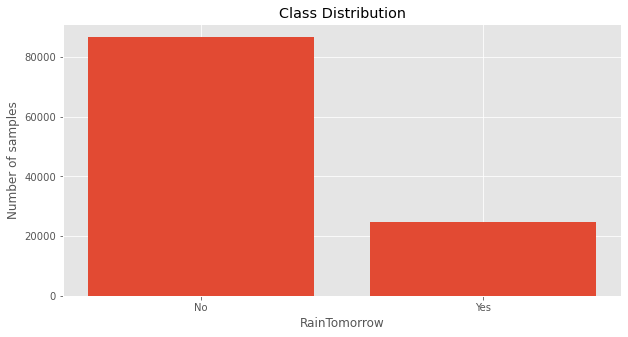

In [356]:
class_dist = df.groupby('RainTomorrow').size().reset_index(name='counts').sort_values('counts', ascending=False)
plt.figure(figsize=(10,5))
plt.bar(class_dist['RainTomorrow'], class_dist['counts'])
plt.title('Class Distribution')
plt.ylabel('Number of samples')
plt.xlabel('RainTomorrow');

In [357]:
### looking at boxplots of various varibales

<AxesSubplot:>

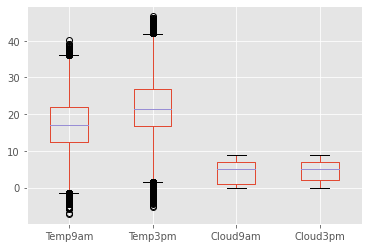

In [358]:
df[['Temp9am','Temp3pm','Cloud9am','Cloud3pm']].plot.box(vert = True, grid = True)


<AxesSubplot:>

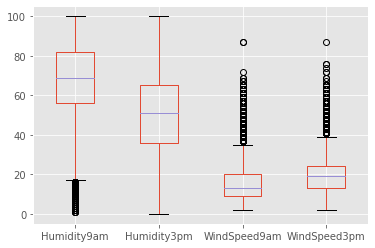

In [359]:

df[['Humidity9am','Humidity3pm','WindSpeed9am','WindSpeed3pm']].plot.box(vert = True, grid = True)



<AxesSubplot:>

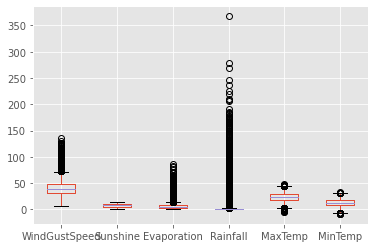

In [360]:
df[['WindGustSpeed','Sunshine','Evaporation','Rainfall','MaxTemp','MinTemp']].plot.box(vert = True, grid = True)

In [361]:
len(df)

111374

In [362]:
df=df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis = 1)


In [363]:
### filling null values of numerical variables to the mean of the respective distribution.

In [364]:
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())

In [365]:
df.isnull().sum()


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
day              0
month            0
year             0
dtype: int64

In [366]:
len(df)

111374

In [367]:
df['Rainfall']=df.apply(lambda x: x['Rainfall']+1,axis=1)
df['Rainfall_base10'] = np.log10(df['Rainfall'])
df['Rainfall_base2'] = np.log2(df['Rainfall'])


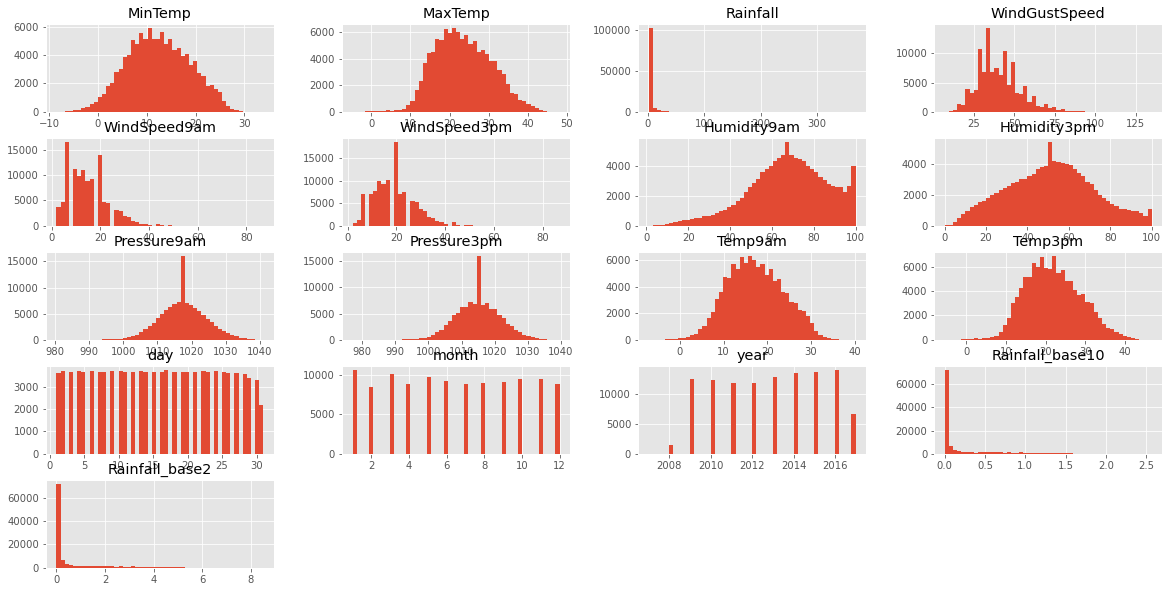

In [368]:
df.hist(bins=50, figsize=(20, 10))
plt.title('varibale distribution ')
plt.show()

In [369]:
df['Rainfall_base2'].describe()

count    111374.000000
mean          0.704887
std           1.311712
min           0.000000
25%           0.000000
50%           0.000000
75%           0.847997
max           8.525912
Name: Rainfall_base2, dtype: float64

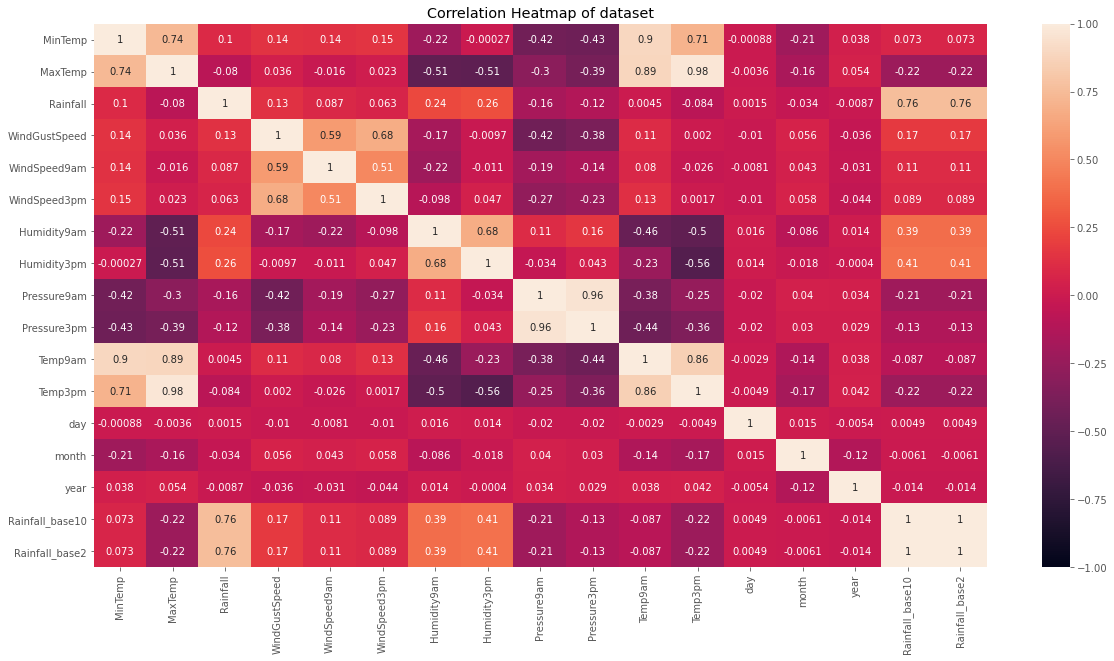

In [370]:
plt.figure(figsize=(20,10))
plt.title('Correlation Heatmap of dataset')
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [371]:
## the below code outputs the variation of Rain category distribution in top 5 location,
## we can observe a cyclic pattern eventhough its not strong

<Figure size 432x288 with 0 Axes>

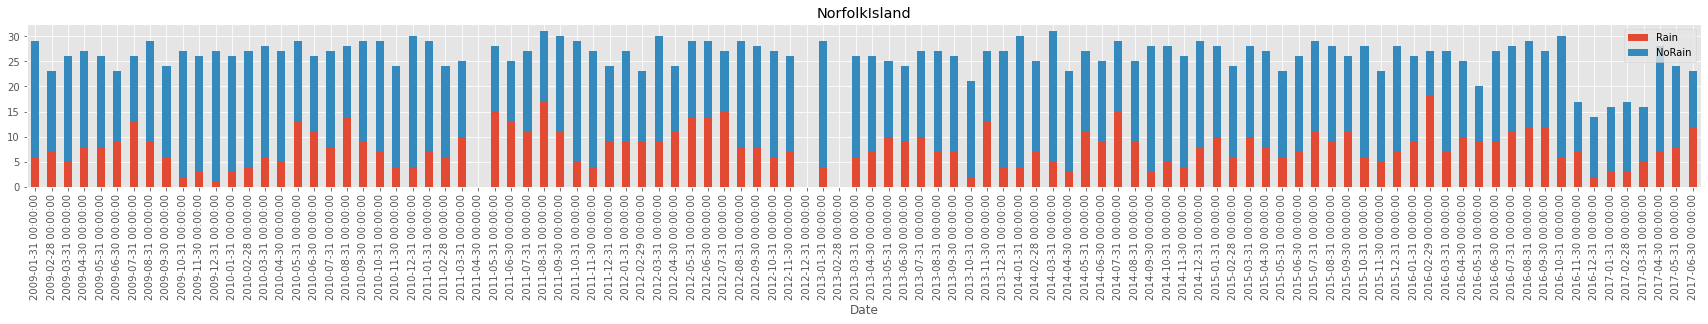

<Figure size 432x288 with 0 Axes>

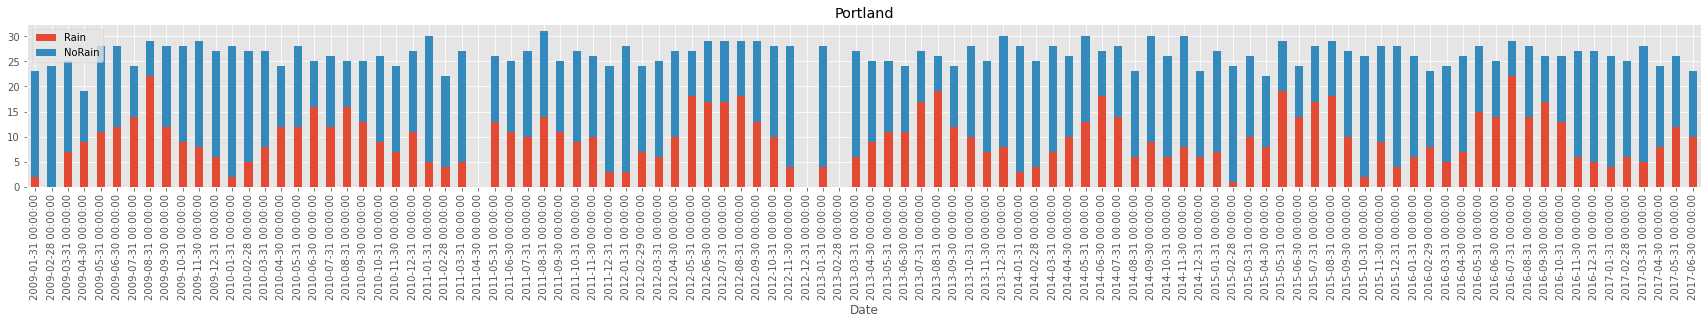

<Figure size 432x288 with 0 Axes>

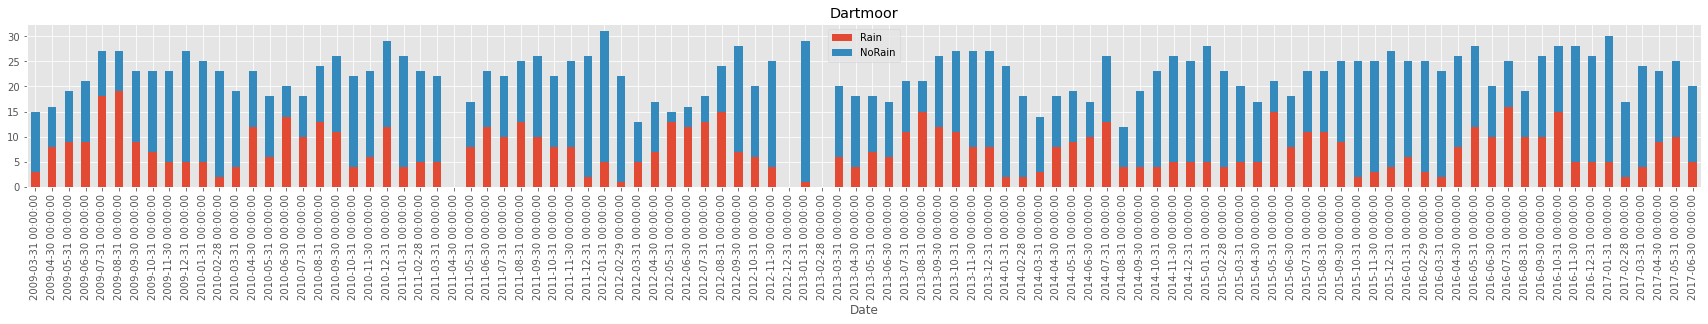

<Figure size 432x288 with 0 Axes>

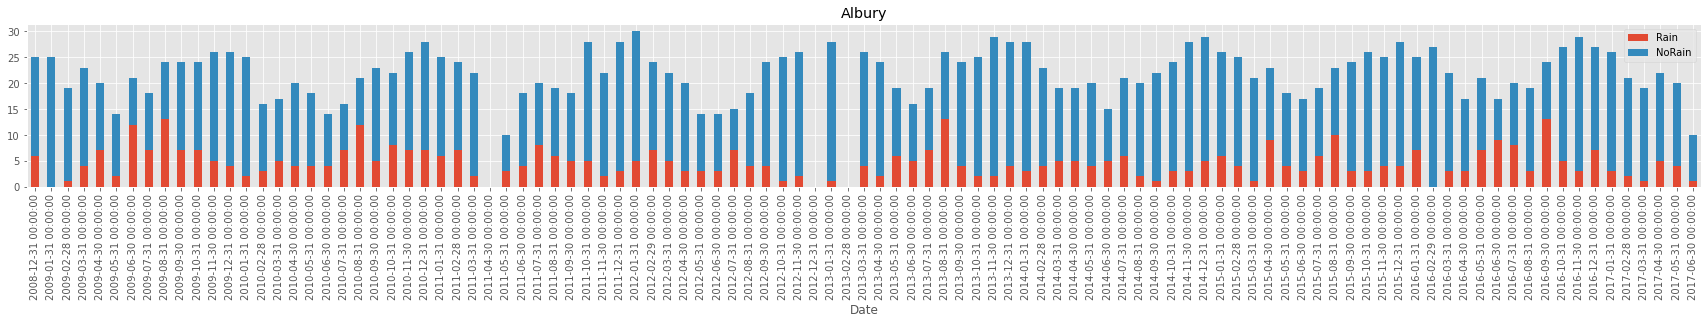

<Figure size 432x288 with 0 Axes>

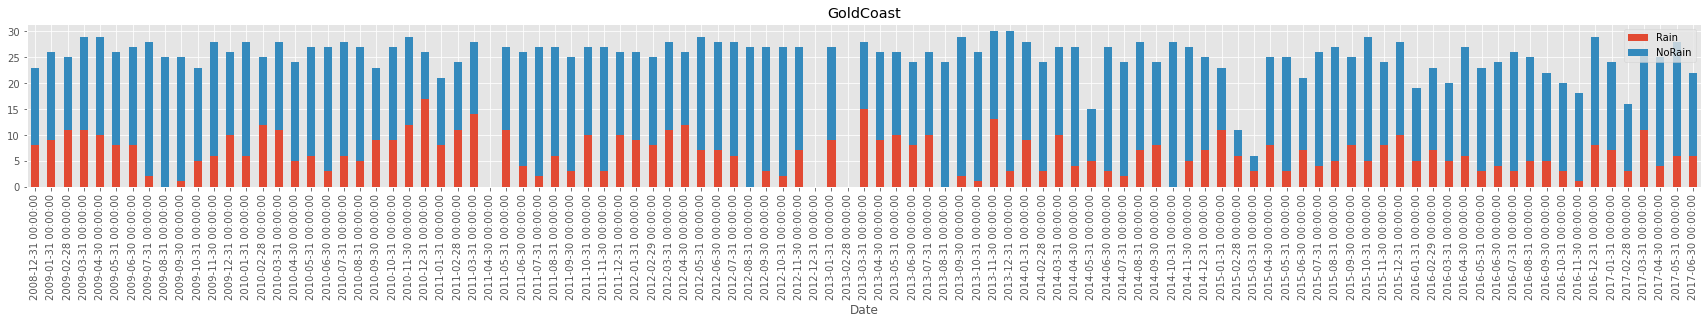

In [372]:
for location in df.Location.unique()[:5]:
  df_subset = df[df['Location'] == location]
  df_monthly = df_subset.set_index('Date').resample('M')
  df_disp = pd.DataFrame()
  df_disp['Rain'] = df_monthly['RainTomorrow'].apply(lambda x: (x == 'Yes').sum())
  df_disp['NoRain'] = df_monthly['RainTomorrow'].apply(lambda x: (x == 'No').sum())

  #sns.lineplot(x="d_date", y="Rain", data=df_disp)
  plt.figure()
  df_disp.plot(kind = 'bar', stacked = True, figsize=(30,3), title = location)

In [373]:
## remove unwanted data for simplicity.

In [374]:

df.drop(['Temp3pm','Temp9am','Date','day','month','year','Rainfall_base2','Rainfall','Location'], axis = 1, inplace=True) 


In [375]:
df.info

<bound method DataFrame.info of        MinTemp  MaxTemp WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
22316     16.1     22.1           S           31.0        SSW          S   
75456     11.6     26.4           W           37.0        NNW          W   
81222      6.8     16.5          NW           37.0          N        WNW   
1753      16.9     34.0           N           30.0          E        ESE   
92976      8.0     20.4         SSE           30.0        WNW        ESE   
...        ...      ...         ...            ...        ...        ...   
78339     16.7     22.7         SSW           46.0          W        ENE   
70831     15.7     32.3           W           37.0         NE        NNW   
78525      5.1     13.8         ENE           13.0         NE        ENE   
19355      5.8     17.1         WNW           22.0         NW         NW   
55434      9.5     26.7         NNE           35.0        NNE          N   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidit

In [376]:
# Binary conversion of categories.
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

# Categorical variables WindGustDir, WindDir3pm and WindDir9am in one hot encoding.
categoric_c = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
datafinal = pd.get_dummies(df, columns=categoric_c)
print(datafinal.shape)
datafinal.head()

(111374, 60)


,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
22316,16.1,22.1,31.0,13.0,13.0,70.0,70.0,1020.2,1018.2,1,...,0,0,0,0,0,1,0,0,0,0
75456,11.6,26.4,37.0,19.0,17.0,72.0,59.0,1018.4,1015.5,0,...,1,0,0,0,0,0,0,0,0,0
81222,6.8,16.5,37.0,9.0,20.0,99.0,74.0,1015.0,1014.8,0,...,0,0,0,0,0,0,0,0,0,0
1753,16.9,34.0,30.0,7.0,9.0,54.0,29.0,1019.5,1016.3,0,...,0,0,0,0,0,0,0,0,0,0
92976,8.0,20.4,30.0,11.0,15.0,47.0,47.0,1017.2,1014.3,0,...,0,0,0,0,0,0,0,0,1,0


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111374 entries, 22316 to 55434
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   MinTemp          111374 non-null  float64 
 1   MaxTemp          111374 non-null  float64 
 2   WindGustDir      111374 non-null  category
 3   WindGustSpeed    111374 non-null  float64 
 4   WindDir9am       111374 non-null  category
 5   WindDir3pm       111374 non-null  category
 6   WindSpeed9am     111374 non-null  float64 
 7   WindSpeed3pm     111374 non-null  float64 
 8   Humidity9am      111374 non-null  float64 
 9   Humidity3pm      111374 non-null  float64 
 10  Pressure9am      111374 non-null  float64 
 11  Pressure3pm      111374 non-null  float64 
 12  RainToday        111374 non-null  int64   
 13  RainTomorrow     111374 non-null  int64   
 14  Rainfall_base10  111374 non-null  float64 
dtypes: category(3), float64(10), int64(2)
memory usage: 11.4 MB


In [378]:
##just viewing categories

In [379]:
print(df.WindGustDir.cat.categories)

Index(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'],
      dtype='object')


In [380]:
## normalizaing our data values.

In [381]:
MINMAX = preprocessing.MinMaxScaler()
MINMAX.fit(datafinal)
df = pd.DataFrame(MINMAX.transform(datafinal), index=datafinal.index, columns=datafinal.columns)
df.head()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
22316,0.580189,0.508507,0.187500,0.129412,0.129412,0.696970,0.70,0.656198,0.6576,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75456,0.474057,0.589792,0.234375,0.200000,0.176471,0.717172,0.59,0.626446,0.6144,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81222,0.360849,0.402647,0.234375,0.082353,0.211765,0.989899,0.74,0.570248,0.6032,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1753,0.599057,0.733459,0.179688,0.058824,0.082353,0.535354,0.29,0.644628,0.6272,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92976,0.389151,0.476371,0.179688,0.105882,0.152941,0.464646,0.47,0.606612,0.5952,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [382]:
## splitting data into X and Y  

In [383]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [384]:
from sklearn.model_selection import train_test_split

## train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [385]:
X_train.shape, X_test.shape

((89099, 59), (22275, 59))

[[16433   894]
 [ 2374  2574]]
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     17327
         1.0       0.74      0.52      0.61      4948

    accuracy                           0.85     22275
   macro avg       0.81      0.73      0.76     22275
weighted avg       0.84      0.85      0.84     22275



In [387]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [388]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0., 0., 0., ..., 0., 0., 1.])

In [389]:
from sklearn.metrics import accuracy_score

## printing accurary score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8457


In [390]:
## checking for overfitting problems
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8455
Test set score: 0.8457


In [391]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [392]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8453
Test set score: 0.8463


In [393]:
#### confusion matrix 

In [394]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[16426   901]
 [ 2537  2411]]

True Positives(TP) =  16426

True Negatives(TN) =  2411

False Positives(FP) =  901

False Negatives(FN) =  2537


In [395]:
### a more indepth evaluation scores.


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     17327
         1.0       0.73      0.49      0.58      4948

    accuracy                           0.85     22275
   macro avg       0.80      0.72      0.74     22275
weighted avg       0.84      0.85      0.83     22275



In [396]:
##classifier using multilayer neural network (deep learning)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [397]:

predictions = mlp.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
## checking for overfitting problems
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Model accuracy score: 0.8457
Training set score: 0.8455
Test set score: 0.8457
[[16162  1165]
 [ 2106  2842]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91     17327
         1.0       0.71      0.57      0.63      4948

    accuracy                           0.85     22275
   macro avg       0.80      0.75      0.77     22275
weighted avg       0.85      0.85      0.85     22275



In [330]:
### scope of furthur improvement 
###1. Can consider the cyclic nature and a observed in relation to date and location and a lot more in to feature engineering.
###2. Can do some hyper parameter tuning using gridsearchcv for both the models especially regarding hidden layers in NN.
###3. Can explore more classifiers 
